#1. Upload File

In [1]:
# model name = 'res10_300x300_ssd_iter_140000.caffemodel' --> trained model
# prototxt_name = 'deploy.prototxt.txt' --> store the information of the model
# file_name = obama1,2,3
from google.colab import files
files.upload()

Saving deploy.prototxt.txt to deploy.prototxt.txt
Saving obama_01.jpeg to obama_01.jpeg
Saving obama_02.jpeg to obama_02.jpeg
Saving obama_03.jpg to obama_03.jpg
Saving res10_300x300_ssd_iter_140000.caffemodel to res10_300x300_ssd_iter_140000.caffemodel


In [2]:
!ls -al

total 10676
drwxr-xr-x 1 root root     4096 Jun  3 06:38 .
drwxr-xr-x 1 root root     4096 Jun  3 06:37 ..
drwxr-xr-x 4 root root     4096 Jun  1 13:40 .config
-rw-r--r-- 1 root root    28092 Jun  3 06:38 deploy.prototxt.txt
-rw-r--r-- 1 root root     9532 Jun  3 06:38 obama_01.jpeg
-rw-r--r-- 1 root root     5172 Jun  3 06:38 obama_02.jpeg
-rw-r--r-- 1 root root   194499 Jun  3 06:38 obama_03.jpg
-rw-r--r-- 1 root root 10666211 Jun  3 06:40 res10_300x300_ssd_iter_140000.caffemodel
drwxr-xr-x 1 root root     4096 Jun  1 13:40 sample_data


#2. Load File

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [4]:
model_name = 'res10_300x300_ssd_iter_140000.caffemodel'
prototxt_name = 'deploy.prototxt.txt'
file_name = 'obama_01.jpeg'

In [5]:
min_confidence = 0.3
frame_width = 300
frame_height = 300

In [6]:
frame = cv2.imread(file_name)
(height, width) = frame.shape[:2]
print(height, width)

251 201


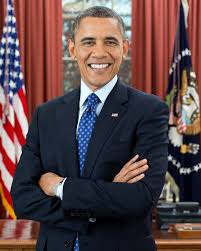

In [7]:
cv2_imshow(frame)

#3. DNN Model

In [8]:
model = cv2.dnn.readNetFromCaffe(prototxt_name, model_name)

In [9]:
blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300,300), (104.0, 177.0, 123.0))

In [ ]:
blob

In [13]:
model.setInput(blob)
detections = model.forward()
print(detections)

[[[[0.         1.         0.9999944  ... 0.06445743 0.6099704
    0.33674896]
   [0.         1.         0.13304923 ... 0.36649123 0.9920384
    0.540483  ]
   [0.         1.         0.12614086 ... 3.9947686  4.834924
    4.979075  ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]]]


0.9999944 74 16 122 84


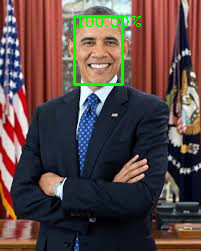

In [14]:
for i in range(0, detections.shape[2]):
  # extract confidence
  confidence = detections[0,0,i,2]
  if confidence > min_confidence:
    box = detections[0,0,i,3:7] * np.array([width, height, width, height])
    (start_x, start_y, end_x, end_y) = box.astype('int')
    print(confidence, start_x, start_y, end_x, end_y)
    text = '{:.2f}%'.format(confidence*100)
    y = start_y - 10 if start_y > 20 else start_y+10
    cv2.rectangle(frame, (start_x, start_y), (end_x, end_y), (0,255,0), 2)
    cv2.putText(frame, text, (start_x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,255,0), 1)

# show the output
cv2_imshow(frame)